# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Machine Learning
- Course ID: BDA500NAA.05380.2237
- Professor: Dr. Amir Moslemi

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier


## Task 1

### Objectives
- Get familiar with the Support Vector Machine, regularization, and hyperparameter optimization.  
- Further understand training, tuning, evaluation, and prediction, in Machine Learning Projects. 


### Data
- Use the Iris dataset from Sklearn. 
- This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

### Data Clearning & Observations

In [31]:
# load data
iris = datasets.load_iris()

# create feature matrix and target value
X = iris['data']
y = iris['target']

# create function to modify the target 
f = np.vectorize({i: name for i, name in enumerate(iris['target_names'])}.get)
# create the dataframe
df = pd.DataFrame(np.c_[X, f(y)], columns=iris['feature_names']+['target'])
# change the dtype of features to float
df = df.astype({feature: float for feature in iris['feature_names']})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
# check number of each category in target value 
df['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [77]:
# meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
# brief statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


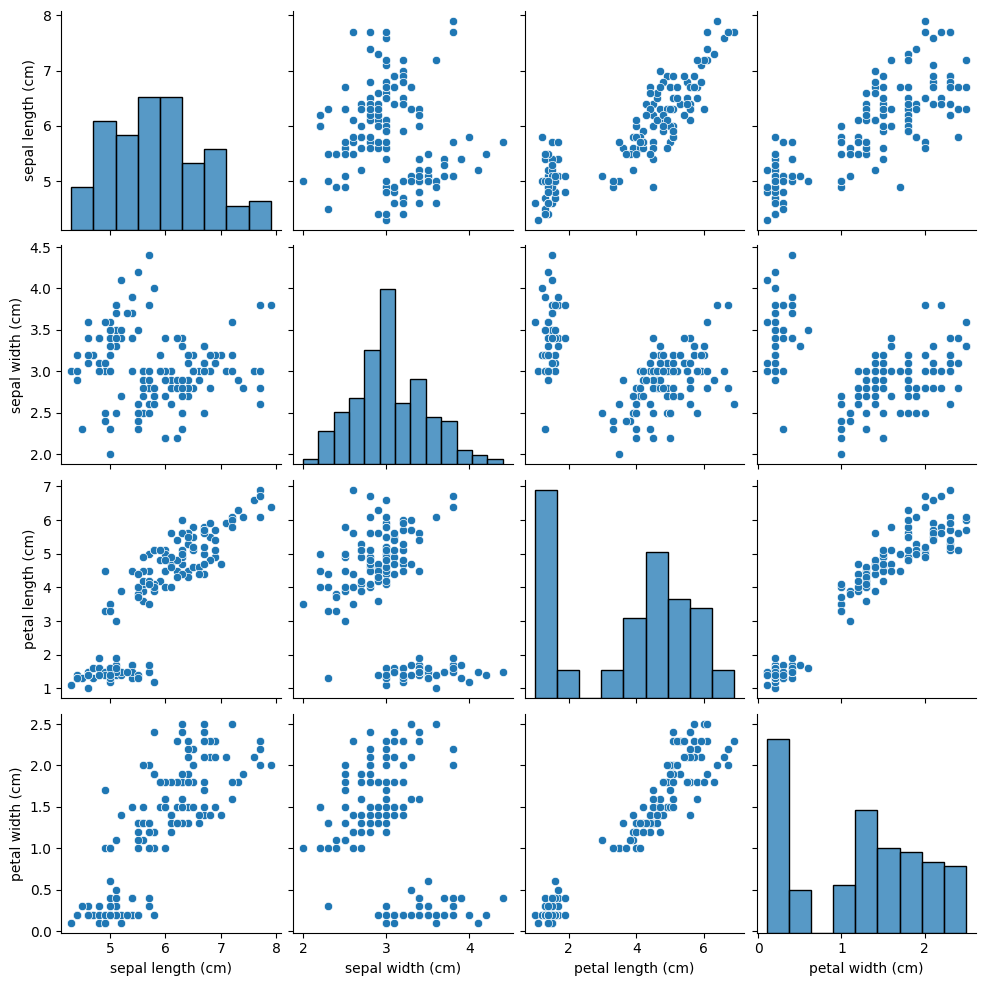

In [45]:
# pair plot
sns.pairplot(df.iloc[:, :4])

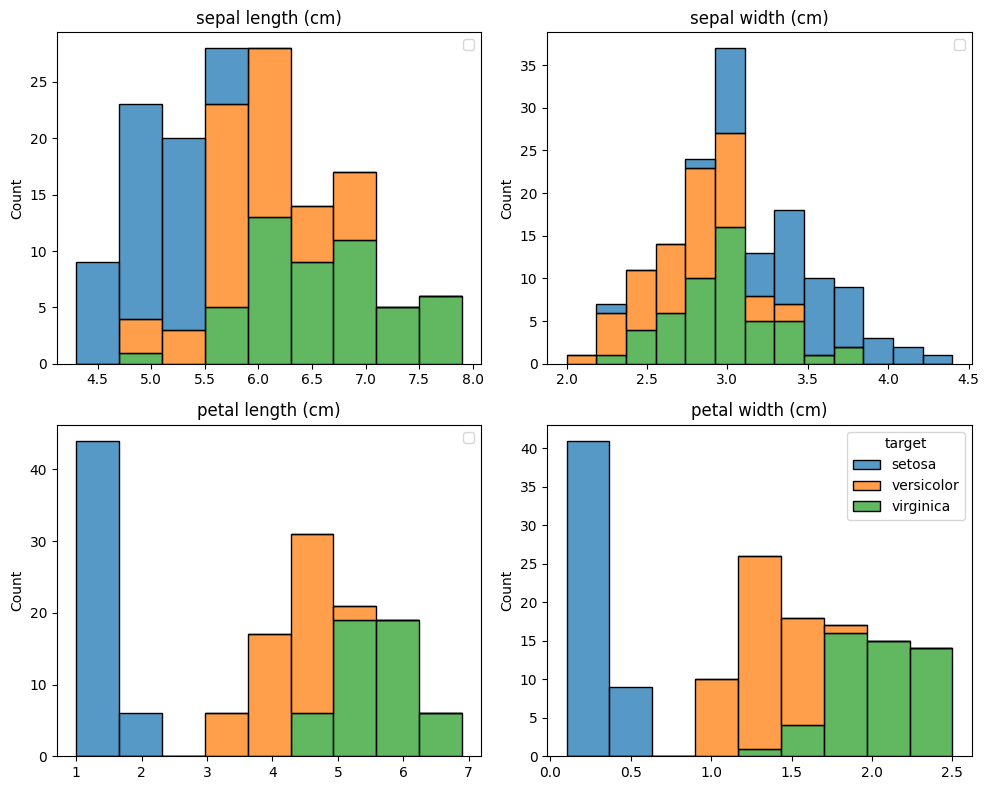

In [78]:
# histogram of each feature conditioned by target value

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, feature in enumerate(iris['feature_names']):
    r, c = i // 2, i % 2
    # create a histogram
    sns.histplot(data=df, x=feature, hue='target', multiple='stack', ax=ax[r][c])
    # title
    ax[r][c].set_title(feature)
    # x labels off
    ax[r][c].set_xlabel('')
    # legend off
    if i < 3:
        ax[r][c].legend('')
 
plt.tight_layout()
plt.show()


### Models Creation

- LinearSVC


- SVC, set hyperparameter kernel as “linear” , 
refer to: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


- SGDClassifier, apply the parameter: loss=”hinge”, try the rest parameters by yourself. Refer to: https://scikit- learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


- SVC, set hyperparameters kernel as “rbf”, random_state as zero. No other parameter settings.


- SVC, use RandomizedSearchCV() to optimize the hyperparameters. 